## subject 56, GE 1, B_mode trimmed data
## fistulogram not included, but code for fistulogram review included
## added some commented code for morphologic filtering

morphologic filtering and median filtering variably used <br>

Revised January 2023
Revised February through May 2021
William (Rick) Weitzel, August 20, 2020 - Sept 15, 2020 <br>

For investigational use only and prepared for release under open source 3-clause BSD license <br>

In [1]:
# libraries for data analysis, plotting, and interaction
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import ipyvolume as ipv
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox

# speckle tracking libraries
# from tim_library import pointsDelta, peaks, waveUtilsb
# from tim_rick_library import speckleTrack, fileIO
# from rick_lib import gui_tools as gt
# from scipy import signal


ModuleNotFoundError: No module named 'pydicom'

In [ ]:
# import sys 

In [ ]:
# sys.path

# skip steps down to loading the cropped data

In [ ]:
# skip this step - already converted to pixel data (.npy file)
file_directory = './061722_TEST_dcm_3D/'
# substring = '.npy'
substring = '.dcm'
file_list = []
all_files = os.listdir(file_directory)
for i in range(0,len(all_files)):
    if substring in all_files[i]:
        file_list.append(all_files[i])
file_list.sort() # needed to correct os.listdir() order

In [ ]:
# skip this step - already converted to pixel data (.npy file)
file_select = widgets.Dropdown(
    options = file_list,
    value = file_list[0],
    description = 'Select File:',
    disabled = False,
    )

f_selected = widgets.Text(
    value=file_select.value,
    placeholder='select file',
    description='File selected:',
    disabled=False
    )

confirm_info = widgets.Text(
    value = f_selected.value,
    placeholder='file info',
    description='Confirm File:',
    disabled=False
)

def on_button1_click(_):
    confirm_info.value = f_selected.value
    return

button1 = widgets.Button(
    description="Press to confirm correct file data file seleted",
    layout={'width': 'max-content'},
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='click to confirm',
    icon='check'
)

def func(change, print_flag=1):
    global pixel_data, shape
#     global ds # for dicom loading
    ds = pydicom.dcmread(file_directory + change['new']) # for dicom
    pixel_data = ds.pixel_array
#     pixel_data = np.load(file_directory + change['new']) # for .npy
    shape = np.shape(pixel_data)
    if print_flag == 1:
            print(shape)
            print('prior file: ',change['old'])
            print('new file: ',change['new'])
    return pixel_data, shape
    
confirm_info.observe(func, names=['value'])
confirm_info.observe(on_button1_click, names="value")
button1.on_click(on_button1_click)

a_link = widgets.link((file_select, 'value'), (f_selected, 'value'))

left_box = VBox([file_select, f_selected])
right_box = VBox([button1, confirm_info])
whole_box = widgets.widgets.widget_box.HBox([left_box, right_box]) #notice workaround

display(whole_box)


In [ ]:
# note image01 is Doppler for TEST on 06 17 2022
# note image02 is Doppler grayscale for TEST on 06 17 2022
# note image03 is grayscale for TEST on 06 17 2022

In [ ]:
# examine a "red" and "gray" pixel
pixel_data[0,300,125], pixel_data[1,100,125]

In [17]:
# master plot frame widget m_plot_frame
def m_plot_frame(frame_number, y_window, x_window):
#     plt.imshow(pixel_data[frame_number[0],y_window[0]:y_window[1],x_window[0]:x_window[1],:],\
#               cmap="gray") # all channels
#     plt.imshow(pixel_data[frame_number[0],y_window[0]:y_window[1],x_window[0]:x_window[1],0],\
#               cmap="gray") # 1st channel
    plt.imshow(pixel_data[frame_number[0],y_window[0]:y_window[1],x_window[0]:x_window[1],2],\
              cmap="gray") # 3rd channel
#     plt.imshow(pixel_data[frame_number[0],y_window[0]:y_window[1],x_window[0]:x_window[1],0],\
#               cmap="gray")
#     plt.imshow(pixel_data[frame_number[0],y_window[0]:y_window[1],x_window[0]:x_window[1],0],)
    return 
widgets.Label(value='file: ' + confirm_info.value)
description_wider = {'description_width': 'initial'}
interact(m_plot_frame,
         frame_number=widgets.IntRangeSlider(value=[0, shape[0]-1],\
    min=0, max=shape[0]-1, step=1,description='frame range',\
    continuous_update=False, style=description_wider),
         x_window = widgets.IntRangeSlider(value=[0,shape[2]-1],\
    min=0, max=shape[2]-1, step=1, description='X range', disabled=False,
    continuous_update=False, orientation='horizontal', readout=True,
    readout_format='d'),
         y_window = widgets.IntRangeSlider(value=[0,shape[1]-1],\
    min=0, max=shape[1]-1, step=1, description='Y range', disabled=False,
    continuous_update=False, orientation='horizontal', readout=True,
    readout_format='d'),
        );

# for file_directory:  ./2_017_PRE_031121/ 
#  and file_name: 2_017_pre_Image08.dcm USE frames=125,350, y=130,330, x=200,500
# notes to self for 2_017_pre_Image10.dcm, parameters are frames 150-475, y_range = 140-300, x_range=167-530, threshold=41-49

# for file_directory:  ./2_016_PRE_030321/ 
#  and file_name: 2_016_pre_Image08.dcm USE frames=90,220, y=100,300, x=200,700

#  and file_name: 2_007_pre_Image.dcm USE frames=0,650, y=170,275, x=320,900

#  and file_name: 2_018_pre_Image12.dcm USE frames=90,320, y=135,315, x=260,645

#  and file_name: 2_019_pre_Image1.dcm USE frames=60,460, y=70,300, x=100,425


#  and file_name: 2_020_pre_Image25.dcm USE frames=10,648, y=75,400, x=110,470 GRAYSCALE
#  and file_name: 2_020_pre_Image26.dcm USE frames=10,460, y=100,500, x=120,620 DOPPLER
#  and file_name: 2_020_pre_Image30.dcm USE frames=10,436, y=100,450, x=100,699

#  and file_name: 2_017_d55_pre_Image02.dcm USE frames=10,677, y=100,450, x=100,700
#  and file_name: 2_017_d55_pre_Image03.dcm USE frames=20,790, y=100,320, x=60,700 GRAYSCALE
#  and file_name: 2_017_d55_pre_Image04.dcm USE frames=20,700, y=100,350, x=100,700 DOPPLER

# for TEST 20220617 image03 Grayscale, use all frames, y = 150, 300, x = 300, 550

# NOTE: cut y top doen to 58 to preserve scale on image
# for image 02 Doppler, all frames, y range 50 - 308, x range 200- 799
# for image 02 Grayscale, all frames, y range 50 - 308, x range 200- 799
# note: if Doppler is saturated, then the 3rd channel is turned black, but otherwise it is grayscale


NameError: name 'confirm_info' is not defined

In [ ]:
crop_values = [m_plot_frame.widget.children[i].value for i in range(0,3)]
cv = crop_values
cv

In [ ]:
# define values for future use: first in orginal coordinates
crop_values = [m_plot_frame.widget.children[i].value for i in range(0,3)]
cv = crop_values
grid_x = int(crop_values[2][0] + (crop_values[2][1]-crop_values[2][0])/2)
grid_y_top = int(crop_values[1][0] + (crop_values[1][1]-crop_values[1][0])/4)
grid_y_bottom = int(crop_values[1][0] + 3*(crop_values[1][1]-crop_values[1][0])/4)
points_list = [(grid_x, grid_y_top), (grid_x,grid_y_bottom)]
# define values for future use: next in cropped value coordinates
c_grid_x = grid_x - cv[2][0]
c_grid_y_top = grid_y_top - cv[1][0]
c_grid_y_bottom = grid_y_bottom - cv[1][0]
c_y_mid = int((c_grid_y_top + c_grid_y_bottom)/2)
c_midpoint = c_grid_x, c_y_mid
c_data = pixel_data[cv[0][0]:cv[0][1], cv[1][0]:cv[1][1], 
                          cv[2][0]:cv[2][1], :]
# get dimensions / ranges for cropped_image_data (c_data)
c_frames, c_y_dim, c_x_dim, c_rgb = c_data.shape
print(cv)
print(c_frames, c_y_dim, c_x_dim, c_rgb)

In [ ]:
# format to save pixel data
# np.save('2_016_pixel_data_img08', c_data)
# np.save('2_020_pixel_data_img30', c_data)
# np.save('2_020_pixel_data_img25_GRAYSCALE', c_data)
# np.save('2_020_pixel_data_img26_DOPPLER', c_data)
# np.save('2_017_d55_img03_GRAYSCALE', c_data)
# np.save('sono_data_2_017_d55_img04_DOPPLER', c_data)
np.save('image02_artery_Grayscale', c_data)

# resume here - load the cropped data as c_data and begin processing

In [18]:
# get list of .npy files to choose from
# file_directory = './3D_54_GE_021623/'
# file_directory = './3D_55_GE_07182023/'
file_directory = './3D_56_GE_20230928/'
substring = '.npy'
# substring = '.dcm'
file_list = []
all_files = os.listdir(file_directory)
for i in range(0,len(all_files)):
    if substring in all_files[i]:
        file_list.append(all_files[i])
file_list.sort() # needed to correct os.listdir() order
file_list

['1_B_Mode.npy', '1_B_Mode_trimmed.npy', '2_Power_Doppler.npy', '3_B_Flow.npy']

In [19]:
data_directory = './3D_56_GE_20230928/'
file = '1_B_Mode_trimmed.npy'
c_data = np.load(data_directory + file)

In [20]:
c_frames, c_y_dim, c_x_dim, c_rgb = c_data.shape

In [21]:
c_frames, c_y_dim, c_x_dim, c_rgb

(902, 150, 425, 3)

manually trim the data more

In [ ]:
# c_data = c_data[:,25:,:,:]

In [ ]:
# c_data.shape

In [ ]:
# c_frames, c_y_dim, c_x_dim, c_rgb = c_data.shape

In [ ]:
# c_frames, c_y_dim, c_x_dim, c_rgb

# thresholding

In [22]:
# thresholding
# note: default threshold values set to 20,50 in prep for voila version
# and file_name:  2_017_pre_Image08.dcm USE threshold = 0,30
# and file_name:  2_016_pre_Image08.dcm USE threshold = 0,20
# and file_name:  2_007_pre_Image.dcm USE threshold = 0,1
# and file_name:  2_018_pre_Image12.dcm USE threshold = 0,20
# and file_name:  2_019_pre_Image1.dcm USE threshold = 0,4
# FOR Power Doppler: 2_020, above 170 works well, t_lower >170  
# FOR Power Doppler: 2_017_d55 img01, above 140 works, t_lower >140, and need two lumens selected  
# FOR GRAYSCALE: 2_017_d55 img03, below 30 works, t_upper < 30, 
# FOR Power Doppler: image01_artery_Doppler, above 140 works, t_lower >140, and need two lumens selected  
# FOR GRAYSCALE: image03_artery, below 40, t_uppoer < 40, acheck how many lumens needed

def threshold_frame(frame_number, threshold):
#     plt.imshow(c_data[frame_number,:,:,0], \
    plt.imshow(c_data[frame_number,:,:,2], \
        vmin = threshold_frame.widget.children[1].value[0],
        vmax = threshold_frame.widget.children[1].value[1],
               cmap='gray')
    return threshold_frame.widget.children[1].value

description_wider = {'description_width': 'initial'}
interact(threshold_frame,
        frame_number=widgets.IntSlider(min=0, 
    max=c_frames-1, step=1,value=0, style=description_wider),
#         threshold = widgets.IntRangeSlider(value=[20,50],\ #starter for grayscale
        threshold = widgets.IntRangeSlider(value=[0,40], \
    min=0, max=255, step=1, description='thresh_range', disabled=False,
    continuous_update=False, orientation='horizontal', readout=True,
    readout_format='d'),
    );

# note sometimes setting lower values (e.g. 10 instead of 40), for more selective grayscale

interactive(children=(IntSlider(value=0, description='frame_number', max=901, style=SliderStyle(description_wi…

In [33]:
threshold_values = threshold_frame.widget.children[1].value
t_lower, t_upper = threshold_values
print(t_lower, t_upper)

0 1


In [24]:
#  on hold to get mask from range
# lumen_mask = np.where((c_data[:,:,:,0] > t_lower) & (c_data[:,:,:,0] < t_upper),1,0)
# lumen_mask_1 = np.where((c_data[:,:,:,0] > t_lower),0,1)
# lumen_mask_2 = np.where((c_data[:,:,:,0] < t_upper),1,0)
# lumen_mask = np.bitwise_and(c_data[:,:,:,0] > t_lower) & (c_data[:,:,:,0] < t_upper)

In [34]:
# now that we have the threshold in mind
# we'll create the lumen mask
# need to work on logic here
# lumen_mask = np.where((c_data[:,:,:,0] < t_upper) & (c_data[:,:,:,0] > t_lower), 1, 0)
# lumen_mask = np.where((c_data[:,:,:,0] < t_upper) & (c_data[:,:,:,0] < t_lower), 1, 0)
# lumen_mask = np.where((c_data[:,:,:,0] < t_upper), 1, 0) # for grayscale 
# NOTE: uppler bound for grayscale and use lower bound for power Doppler
# lumen_mask = np.where((c_data[:,:,:,0] > t_lower), 1, 0) # for power Doppler
lumen_mask = np.where((c_data[:,:,:,0] < t_upper), 1, 0) # for grayscale NOTE CHANNEL SELECTION

In [35]:
# and examine them interactively
# different things tried as the data
# examine the frames

def plot_lumen(frame_number):
    frame = lumen_mask[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('ultrasound lumen mask data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_lumen, frame_number=widgets.IntSlider(min=0, 
    max=len(lumen_mask)-1, step=1,value=0, style=description_wider),
    continuous_update = False);

interactive(children=(IntSlider(value=0, description='frame_number', max=901, style=SliderStyle(description_wi…

In [36]:
# examine 
# the next major step is segmentation
labels, nlabels = ndi.label(lumen_mask)
labels.shape, nlabels


((902, 150, 425), 13753)

# used for multiple lumen segments - skip down for single segment

In [38]:
# below used for multiple lumens selection (skip for single)
# lumen_labels[0] = labels[18, 45, 360]
lumen_labels = []
lumen_labels.append(labels[190, 139, 200])
# lumen_labels.append(labels[26, 100, 175])
# lumen_labels.append(labels[53, 100, 195])
# lumen_labels.append(labels[76, 100, 200])
# lumen_labels.append(labels[99, 100, 180])
# lumen_labels.append(labels[120, 100, 175])
# # lumen_labels.append(labels[143, 105, 150])
# lumen_labels.append(labels[240, 140, 105])
# lumen_labels.append(labels[257, 145, 100])
# lumen_labels.append(labels[280, 150, 100])
# lumen_labels.append(labels[303, 150, 105])
# lumen_labels.append(labels[371, 160, 30])
# lumen_labels.append(labels[398, 150, 20])
# lumen_labels.append(labels[419, 150, 20])
# lumen_labels.append(labels[442, 160, 20])
# lumen_labels.append(labels[463, 170, 20])
# lumen_labels.append(labels[531, 200, 15])
# lumen_labels.append(labels[554, 200, 15])
# lumen_labels.append(labels[575, 205, 20])
# lumen_labels.append(labels[622, 205, 40])
# lumen_labels.append(labels[643, 200, 75])
# lumen_labels.append(labels[663, 205, 90])
# lumen_labels.append(labels[683, 205, 105])
# lumen_labels.append(labels[705, 220, 110])
# lumen_labels.append(labels[791, 225, 15])
lumen_labels

[971]

In [39]:
label_number = lumen_labels[0]
label_number

971

In [40]:
test = np.where(labels == label_number, 1, 0)

In [41]:
test.shape

(902, 150, 425)

In [42]:
# now let's examine the test data interactively 
def plot_vessel_segments(frame_number):
    frame = test[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('vessel segment data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_vessel_segments, frame_number=widgets.IntSlider(min=0, 
    max=len(test)-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='frame_number', max=901, style=SliderStyle(description_wi…

In [ ]:
# add segments

In [43]:
selected_lumen_labels = [x for x in lumen_labels if x != 0]

In [44]:
selected_lumen_labels = [x for x in selected_lumen_labels if x != 1]

In [45]:
selected_lumen_labels

[971]

In [ ]:
selected_lumen_labels = [17, 6272, 8365]

In [ ]:
# # construct a list of individual 3D image blocks (vessel_segments) for each segment
# vessel_segment = []
# for label_number in selected_lumen_labels:
#     vessel_segment.append([np.where(labels == label_number, 1, 0)])

In [27]:
# arr = np.zeros((2, 3))
vessel_segments = np.zeros((937, 250, 300))

In [28]:
for label_number in selected_lumen_labels:
    vessel_segments = vessel_segments + np.where(labels == label_number, 1, 0)

In [29]:
vessel_segments.shape

(937, 250, 300)

In [ ]:

# list of non-zero unique vessel segments
# vessel_segment = \
#     vessel_segments[0][0] + \
#     vessel_segments[1][0] + \
#     vessel_segments[5][0] + \
#     vessel_segments[9][0] + \
#     vessel_segments[10][0] + \
#     vessel_segments[13][0] + \
#     vessel_segments[14][0] + \
#     vessel_segments[15][0] + \
#     vessel_segments[21][0]
#     vessel_segments[1][0] + \
#     vessel_segments[2][0] + \
#     vessel_segments[4][0] + \
#     vessel_segments[5][0] + \
#     vessel_segments[6][0] + \
#     vessel_segments[7][0] + \
#     vessel_segments[8][0] + \
#     vessel_segments[11][0]

In [ ]:
# lumen_label = 2
# vessel_segment = np.where(labels == label_number, 1, 0)

rename test to vessel_segments

In [46]:
vessel_segments = test

In [47]:
# now let's examine the combined vessel segment interactively 
def plot_vessel_segments(frame_number):
    frame = vessel_segments[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('vessel segment data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_vessel_segments, frame_number=widgets.IntSlider(min=0, 
    max=len(vessel_segments)-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='frame_number', max=901, style=SliderStyle(description_wi…

In [48]:
# this one without morphologic, binary, median filtering
z_max, y_max, x_max = vessel_segments.shape
print('dimensions \n',
      z_max, '\n',
      y_max, '\n',
      x_max, '\n')

dimensions 
 902 
 150 
 425 



In [49]:
# tomogram (sono-tomogram) t_plot_frame
# examine slices (note: we choose / focus on U-D (up - down),
# which is along the y-axis in this coordinate system
# since this is the approximate orientation of the fistulogram
# data = data
# data = vessel_segment - this one without binary filtering

def t_plot_frame(top_view_slice):
    frame = vessel_segments[:,top_view_slice,:]
#     frame = seg_close[:,top_view_slice,:]
    frame = frame.T
    plt.imshow(frame, cmap='gray', aspect=1)
    plt.title('ultrasound tomography "top view" data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(t_plot_frame, top_view_slice=widgets.IntSlider(min=0, 
    max=y_max-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='top_view_slice', max=149, style=SliderStyle(description_…

# now create sono-angiogram

In [50]:
# Next: select the slice of 3D ultrasound data within the y-axis 
# that provides fistula data to render the "sono-angiogram"
# Here we used data[:,13:60,:] 
# and sum up the image - like a 2D fistulogram - along this axis
# incidentally, transpose the matrix to provide correct orientation
result = np.sum(vessel_segments[:,:,:], axis = 1)
resultT = result.T

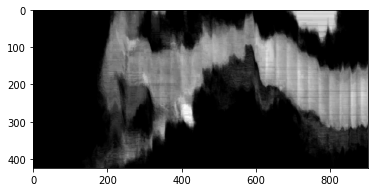

In [51]:
plt.imshow(resultT, aspect = 1.0, cmap='gray')
# plt.colorbar();

In [53]:
# check file directory name
file_directory

'./3D_56_GE_20230928/'

In [52]:
# save image binary
np.save('file_directory'+'subj_56_GE_1_B_mode_binary', vessel_segments)

# Apply morphologic and median filtering

In [ ]:
# vessel_segment = vessel_segment_1 + vessel_segment_2 # using multiple segments

rename back to vessel_segment

In [ ]:
vessel_segment = vessel_segments

In [ ]:
segment_close = ndi.binary_closing(vessel_segment, iterations=5)
# segment_erode = ndi.binary_erosion(vessel_segment, iterations=5)
seg_close_erode = ndi.binary_erosion(segment_close, iterations=5)
# seg_erode_close = ndi.binary_closing(segment_erode, iterations=5)

In [ ]:
# trying some morphologic filtering again
# NOTE: binary closing of an input image by a structuring element 
# is the _erosion_ of the _dilation_ of the image by the structuring element
# seg_close = ndi.binary_closing(vessel_segment, iterations=10)

examine morphologic filtering

In [ ]:
def t_plot_frame(top_view_slice):
#     frame = vessel_segment[:,top_view_slice,:]
#     frame = segment_close[:,top_view_slice,:]
    frame = seg_close_erode[:,top_view_slice,:]
    frame = frame.T
    plt.imshow(frame, cmap='gray', aspect=1)
    plt.title('ultrasound tomography "top view" data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(t_plot_frame, top_view_slice=widgets.IntSlider(min=0, 
    max=y_max-1, step=1,value=0, style=description_wider));

In [ ]:
# median filtering (caution - takes a long time)
# set up
import time

In [ ]:
# run median filter
start_time = time.time()
# vessel_segment_medFilt20 = ndi.median_filter(vessel_segment, size=20)
vessel_seg_close_erode_medFilt10 = ndi.median_filter(seg_close_erode, size=10)
end_time = time.time()
filter_runtime = end_time - start_time
filter_runtime


In [ ]:
# test time
t1 = time.time()
time.sleep(0.9948312)
t2 = time.time()
diff_time = t2 - t1
diff_time

In [ ]:
# vesel_segment = seg_close_erode 
# vessel_segment = seg_erode_close
# vessel_segment = segment_erode
# vessel_segment = segment_close

In [ ]:
vessel_segment = vessel_seg_close_erode_medFilt10

In [ ]:
# tomogram (sono-tomogram) t_plot_frame
# examine slices (note: we choose / focus on U-D (up - down),
# which is along the y-axis in this coordinate system
# since this is the approximate orientation of the fistulogram
# data = data
# data = vessel_segment - this one without binary filtering

def t_plot_frame(top_view_slice):
    frame = vessel_segment[:,top_view_slice,:]
#     frame = seg_close[:,top_view_slice,:]
    frame = frame.T
    plt.imshow(frame, cmap='gray', aspect=0.5)
    plt.title('ultrasound tomography "top view" data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(t_plot_frame, top_view_slice=widgets.IntSlider(min=0, 
    max=y_max-1, step=1,value=0, style=description_wider));

In [ ]:
# Next: select the slice of 3D ultrasound data within the y-axis 
# that provides fistula data to render the "sono-angiogram"
# Here we used data[:,13:60,:] 
# and sum up the image - like a 2D fistulogram - along this axis
# incidentally, transpose the matrix to provide correct orientation
result = np.sum(vessel_segment[:,:,:], axis = 1)
resultT = result.T

In [ ]:
plt.imshow(resultT, aspect = 0.8, cmap='gray')
plt.colorbar();

In [ ]:
# invert the result to make display similar to the angiogram
# can use negative values but will use 255 to make non-negative
result_inv = 255 - resultT

In [ ]:
plt.imshow(result_inv, aspect = 0.8, cmap='gray')
plt.colorbar();

In [ ]:
# okay adding median filtering
result_filt = ndi.median_filter(result_inv, size=20)

In [ ]:
plt.imshow(result_filt, aspect = 0.8, cmap='gray')
plt.colorbar();

In [ ]:
# need to flip and pad the data for 3D viewing

In [ ]:
# flip data: obtain proper orientation for display
# TEST: using sub-slice of vessel segment vessel_segment[:,90:140,:]
data_flip_y = np.flip(vessel_segment, axis=1)
data_flip_x = np.flip(data_flip_y, axis=2)
data_flip = data_flip_x

In [ ]:
# NOTE: can skip zero pad for power Doppler data, cropping less restrictive w/ power Doppler
# need to pad the data depending on cropping and image scale
zero_pad_data = np.pad(data_flip, (200,200), \
                       mode='constant', constant_values = (0,0))

In [ ]:
c_frames

In [ ]:
#  now trim the z-axis using number of cropped frames
# trim_zero_pad = zero_pad_data[200:425,:,:] #for 2_017_img08
# trim_zero_pad = zero_pad_data[200:330,:,:] #for 2_016_img08
# trim_zero_pad = zero_pad_data[200:425,:,:] #for 2_017
# trim_zero_pad = zero_pad_data[200:600,:,:] #for 2_018
# trim_zero_pad = zero_pad_data[200:606,:,:] #for 2_020
trim_zero_pad = zero_pad_data[200:770,:,:] #for 2_017_d55_img03_GRAYSCALE

In [ ]:
vessel_segment.shape

In [ ]:
# WARNING - median filtering takes a _long_ time in 3D
# V_med_filt = ndi.median_filter(vessel_segment, size=10)

In [ ]:
V = zero_pad_data
# V = trim_zero_pad # our 3d array
# V = V_med_filt
# V = vessel_segment
# V = data_flip
# V = seg_close
ipv.figure()
ipv.volshow(V, level=[0.25, 0.75], opacity=3.0, level_width=0.2, data_min=0, data_max=1)
ipv.view(-80,20)
ipv.show()

# FINI for version 20210331 (March 31, 2021)

# caution: code below as example kept for reference
# need to rename plotting widgets to avoid losing above data
# morpholigic filtering code also added below as example only

In [ ]:
# load raw data (files deleted with identifiers)
# only .npy files present
# fistula_path = './2_016_fistulogram_raw/SE000019/'
# os.listdir(fistula_path)

In [ ]:
# import skvideo.io

In [ ]:
# video_frames = skvideo.io.vread('./accuracy_test_dicom_data/2_007_fistulogram.wmv')

In [ ]:
# fistulogram_data = video_frames.astype(np.uint8)

In [ ]:
# type(fistulogram_data)

In [ ]:
# fistulogram_data.shape

In [ ]:
# np.save('2_007_fistulogram', fistulogram_data[:,:,:,0])

In [ ]:
# (files deleted with identifiers)
# ds = pydicom.dcmread(fistula_path + os.listdir(fistula_path)[1])
# or
# ds = pydicom.dcmread(file_directory + file_name)
# and
# pixel_data = ds.pixel_array # (or whatever name you choose)

In [ ]:
# fistulogram_2_016 = ds.pixel_array

In [ ]:
# np.save('2_016_fistulogram', fistulogram_2_016)

# begin using .npy fistulogram files

In [ ]:
# lines below used to strip identifiers and save as .npy 

# dir_path = './fistulogram_3D/'
# file_name = '2_019_fistulogram.dcm'
# ds = pydicom.dcmread(dir_path + file_name)
# pixels = ds.pixel_array
# pixels.shape
# np.save('2_019_fistulogram', pixels)

In [ ]:
# lines below used to examine fistulograms
# fistulogram viewer:

# def plot_frame(frame_number):
#     frame = pixels[frame_number,:,:]
#     plt.imshow(frame, cmap='gray')
#     plt.title('fistulogram data: view frames', loc='center')
#     plt.xlabel('pixels')
#     plt.ylabel('pixels')

# description_wider = {'description_width': 'initial'}
# interact(plot_frame, frame_number=widgets.IntSlider(min=0, 
#     max=len(pixels)-1, step=1,value=0, style=description_wider));

In [ ]:
files = os.listdir('./accuracy_test_dicom_data/')
files.sort()
files

In [ ]:
fistulogram = '2_007_fistulogram.npy'

In [ ]:
# fistulogram cine loop in npy format from same subject
fistulogram_data = np.load(dir_path + \
    fistulogram)

In [ ]:
type(fistulogram_data[1,1,1])

In [ ]:
# examine the frames
# fistulogram_02_007, only view of anastomosis
# fistulogram_02_016, only view of anastomosis
# fistulogram_02_017_pre, x1=4.19mm, x2=4.52mm, x3=3.6mm
# fistulogram_02_017_post, after PTA of anast + outflow

# fistulogram_data = fistulogram_2_016 #define input
def plot_frame(frame_number):
    frame = fistulogram_data[frame_number,400:650,200:900]
    plt.imshow(frame, cmap='gray')
    plt.title('fistulogram data: view frames', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_frame, frame_number=widgets.IntSlider(min=0, 
    max=len(fistulogram_data)-1, step=1,value=0, style=description_wider));

In [ ]:
# show fistulogram (sliced)
# fistulogram 2_017_pre: use (9:18,400:650,200:900)
# f_2_017 = np.sum(fistulogram_data \
#     [9:13,400:650,200:900], axis = 0)

# show fistulogram (sliced)
# fistulogram 2_016_pre: use (20:36,400:650,200:900)
# f_2_016 = np.sum(fistulogram_data \
#     [20:36,400:650,200:900], axis = 0)

# show fistulogram (sliced)
# fistulogram 2_016_pre: use (20:36,400:650,200:900)
f_2_007 = np.sum(fistulogram_data \
    [16:23,400:650,200:900], axis = 0)

In [ ]:
# f_2_017.shape
# f_2_016.shape
f_2_007.shape

In [ ]:
type(f_2_007[0,0])

In [ ]:
# fistulogram 2_017_pre: use (9:18,400:650,200:900)
# f_2_017 = fistulogram_data[9:18,400:650,200:900]
# fistulogram 2_016: use (20:36,400:650,200:900)
# f_2_016 = fistulogram_data[20:36,400:650,200:900]
# f_2_007 = fistulogram_data[16:23,400:650,200:900]
plt.imshow(f_2_007, cmap='gray')
plt.title('fistulogram data: view frames', loc='center')
plt.xlabel('pixels')
plt.ylabel('pixels')

# Fini, stopping at fistulogram viewer

In [ ]:
# comparison of fistulagram
# with thresholded, morphologic binary filtered usn data
# fig, axes = plt.subplots(1,2)
# axes[0].imshow(fistulogram_data[10,20:120,40:], cmap='gray')
# axes[0].set_title('fistulogram')
# axes[0].set_xlabel('pixels')
# axes[0].set_ylabel('pixels')
# axes[1].imshow(result_inv[:,:], cmap='gray', aspect=0.5,)
# axes[1].set_xlabel('pixels')
# axes[1].set_title('sonoangiogram');

In [ ]:
# the last step is to apply a median filter 
# to produce the 2D usn image or "sono-angiogram"
# sono_angiogram = ndi.median_filter(result_inv[:,:], size = 30)

In [ ]:
# fig, axes = plt.subplots(1,2,figsize=(10,10))
# axes[0].imshow(fistulogram_data[10,20:120,40:], cmap='gray')
# axes[0].set_title('fistulogram')
# axes[0].set_xlabel('pixels')
# axes[0].set_ylabel('pixels')
# axes[1].imshow(sono_angiogram, cmap='gray', aspect=0.5)
# axes[1].set_xlabel('pixels')
# axes[1].set_title('sonoangiogram');


# Fini

# added some old code for morphologic filtering reference, not used in this notebook

Masks can be "tuned" through the addition and subtraction of pixels. SciPy ndi has methods which include:<br>
binary_dilation: Add pixels along edges <br>
binary_erosion: Remove pixels along edges <br>
binary_opening: Erode then dilate, "opening" areas near edges <br>
binary_closing: Dilate then erode, "filling in" holes <br>

In [ ]:
# # use vessel_segment as data
# data = vessel_segment
# # make different masks from the vessel segment (note: iterations was set to 5 previoulsy)
# # steps to try below
# mask_dilate = ndi.binary_dilation(data, iterations=5)
# mask_erode = ndi.binary_erosion(data, iterations=5)
# mask_open = ndi.binary_opening(data, iterations=5)
# mask_close = ndi.binary_closing(data, iterations=5)

In [ ]:
# # select the frame to examine
# # (make greater than iterations)
# frame_number = 20
# # Plot masked images
# fig, axes = plt.subplots(5,1)
# axes[0].imshow(data[frame_number,:,:])
# axes[1].imshow(mask_dilate[frame_number,:,:])
# axes[2].imshow(mask_erode[frame_number,:,:])
# axes[3].imshow(mask_open[frame_number,:,:])
# axes[4].imshow(mask_close[frame_number,:,:])

In [ ]:
# # lets examine mask_erode
# data = mask_erode
# def plot_frame(frame_number):
#     frame = data[frame_number,:,:]
#     plt.imshow(frame, cmap='gray')

# description_wider = {'description_width': 'initial'}
# interact(plot_frame, frame_number=widgets.IntSlider(min=0, 
#     max=len(data)-1, step=1,value=0, style=description_wider));

In [ ]:
# # lets re-segment
# # look at mask_close
# # the next major step is segmentation
# labels, nlabels = ndi.label(mask_open)
# labels.shape, nlabels

In [ ]:
# # AGAIN
# # find the label of the vessel lumen
# # on frame 71 looks like 30, 300 should give the label
# lumen_label = labels[71, 30, 300]
# lumen_label

In [ ]:
# vessel_segment_2 = np.where(labels == lumen_label, 1, 0)

# there is much more code, the above was simply added as an example